<a href="https://colab.research.google.com/github/jpedrou/esteganografia-em-audios/blob/main/Esteganografia_em_%C3%81udio_Ocultando_Informa%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esteganografia em Áudio: Ocultando Informações

## Importação das Bibliotecas

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO
from scipy.io import wavfile
from IPython.display import Audio



/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


## Parâmetros Globais

In [ ]:
TAMANHO_DO_CABECALHO_EM_BYTES = 4
NOME_ARQUIVO_ORIGINAL = 'audio-demo.wav'
NOME_IMAGEM_SECRETA = 'imagem-demo.jpg'
NOME_ARQUIVO_VIDEO = 'video-curto.mp4'

## Leitura e Padronização do Áudio Original

In [ ]:
taxa_amostragem, dados_audio_original = wavfile.read(NOME_ARQUIVO_ORIGINAL)
if dados_audio_original.ndim > 1:
    dados_audio_original = dados_audio_original[:, 0]
dados_audio_original = dados_audio_original.astype(np.int16)

CAPACIDADE_MAXIMA_BITS = len(dados_audio_original)
print("Dados do áudio", dados_audio_original)
print()
print(f"Capacidade Máxima de Ocultação (bits LSB): {CAPACIDADE_MAXIMA_BITS}")

Dados do áudio [0 0 0 ... 0 0 0]

Capacidade Máxima de Ocultação (bits LSB): 153216


## Ocultação de Mensagem de Texto

In [ ]:
MENSAGEM_SECRETA = "O segredo do LSB é que a referência de término é o cabeçalho de 4 bytes."
NOME_ARQUIVO_COM_TEXTO = 'audio-com-texto.wav'

### 1. Converter a mensagem para bytes

In [ ]:
bytes_mensagem = MENSAGEM_SECRETA.encode('utf-8')
comprimento_mensagem_bytes = len(bytes_mensagem)
comprimento_mensagem_bytes

77

### 2. Criar o Cabeçalho

In [ ]:
cabecalho_comprimento = np.array([comprimento_mensagem_bytes], dtype=np.uint32)
cabecalho_comprimento

array([77], dtype=uint32)

### 3. Combinar o cabeçalho + Mensagem

In [ ]:
bytes_a_ocultar = cabecalho_comprimento.tobytes() + bytes_mensagem
bytes_a_ocultar

b'M\x00\x00\x00O segredo do LSB \xc3\xa9 que a refer\xc3\xaancia de t\xc3\xa9rmino \xc3\xa9 o cabe\xc3\xa7alho de 4 bytes.'

### 4. Converter tudo para bits

In [ ]:
bits_a_ocultar = np.unpackbits(np.frombuffer(bytes_a_ocultar, dtype=np.uint8))
bits_a_ocultar

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,

In [ ]:
capacidade_necessaria = len(bits_a_ocultar)
capacidade_necessaria

648

In [ ]:
if capacidade_necessaria > CAPACIDADE_MAXIMA_BITS:
  print(f"Texto muito longo ({capacidade_necessaria} bits) para o áudio ({CAPACIDADE_MAXIMA_BITS})!")
else:
  print("Tudo ok")

Tudo ok


### 5. Ocultação LSB

In [ ]:
dados_com_texto = dados_audio_original.copy()
dados_com_texto[:capacidade_necessaria] &= ~1
dados_com_texto[:capacidade_necessaria] |= bits_a_ocultar


### 6. Salvar o arquivo

In [ ]:
wavfile.write(NOME_ARQUIVO_COM_TEXTO, taxa_amostragem, dados_com_texto)

In [ ]:
Audio(NOME_ARQUIVO_COM_TEXTO)

### Extração do Texto

#### 1. Carregar os dados do Áudio

In [ ]:
taxa_amostragem_estego, dados_audio_com_texto = wavfile.read(NOME_ARQUIVO_COM_TEXTO)

#### 2. Extrair o cabeçalho

In [ ]:
TAMANHO_CABECALHO_BITS = TAMANHO_DO_CABECALHO_EM_BYTES * 8

In [ ]:
bits_cabecalho = dados_audio_com_texto[:TAMANHO_CABECALHO_BITS] & 1
bytes_cabecalho = np.packbits(bits_cabecalho)
comprimento_mensagem_bytes_recuperado = np.frombuffer(bytes_cabecalho.tobytes(), dtype=np.uint32)[0]

comprimento_mensagem_bytes_recuperado

np.uint32(77)

#### 3. Extrair a mensagem completa

In [ ]:
inicio_mensagem = TAMANHO_CABECALHO_BITS
fim_mensagem = inicio_mensagem + (comprimento_mensagem_bytes_recuperado * 8)
bits_mensagem_extraidos = dados_audio_com_texto[inicio_mensagem:fim_mensagem] & 1

bits_mensagem_extraidos

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

#### 4. Converter os bits para texto

In [ ]:
bytes_mensagem_recuperada = np.packbits(bits_mensagem_extraidos)
mensagem_recuperada = bytes_mensagem_recuperada.tobytes().decode('utf-8')

print("\n--- MENSAGEM RECUPERADA ---")
print(f"'{mensagem_recuperada}'")


--- MENSAGEM RECUPERADA ---
'O segredo do LSB é que a referência de término é o cabeçalho de 4 bytes.'


## Ocultação de Imagem

In [ ]:
NOME_ARQUIVO_COM_IMAGEM = 'audio-com-imagem.wav'

### 1. Carregar e Serializar a Imagem (para bytes PNG)

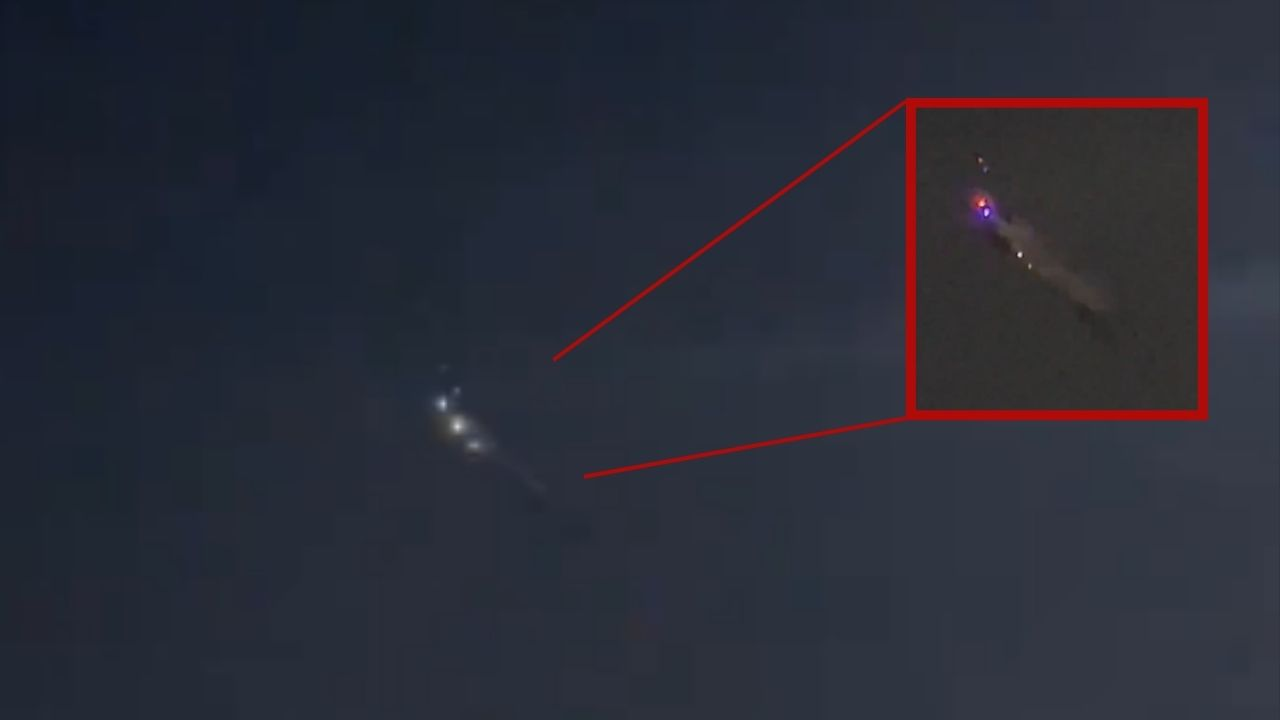

In [ ]:
imagem_secreta = Image.open(NOME_IMAGEM_SECRETA)
imagem_secreta

In [ ]:
imagem_secreta.size

(1280, 720)

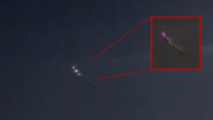

In [ ]:
imagem_secreta = imagem_secreta.resize([213, 120])
imagem_secreta

In [ ]:
buffer_imagem = BytesIO()
imagem_secreta.save(buffer_imagem, format='PNG')
bytes_imagem = buffer_imagem.getvalue()

bytes_imagem

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xd5\x00\x00\x00x\x08\x02\x00\x00\x00\xea\xa0 \xe4\x00\x005 IDATx\x9c\xed}\xfb\xb7$\xc9Q\xde\xf7EU\xf7\xbds\xe7\xce\xec\xechG\x96\x00\xcbB\x96\x10\x16H2H\x088\xf8O\xf0\xff\xeb\x1f$s8\xd8\xb2\xb0\x00\x8386F:\x87\x878\xe8\xb5+\xed\xce\xcc}\xdf\xae\xcc\xf0\x0f\x91\x91\x8fzt\xf7}\xcd\xee\xca\xc4\xd9\xbd\xd3]\x9d\x95\x19\x99\x15\x19\xef\x8c\xe2\xdb\xff\xe6\x8b$A("\xe6\x80\xe8DzU\x05\xa2"\x00 I2\xfd\xac\x04\x95T@\xca-\xf9W\x80\n@\xac\x99_\x8b\xf0\xb1\x08\x00\x8c\xe8\x94\xa5\xbd"\x801\xf5\xa1\xf4\x0e\xa5\xee\\5\xccb\xabL\xcd:J}]\x90Q\x8a\x00\x14\n\xe8\xe8\xce\xe5o @\x08\xd05\x17IP\x15\n@\xd1\x0c\x97\xf1\xa4\xa6\x0fB\xaa\xda\xa0\xcd\xb8\xcav\xb9\x00\xa1\xd8u\xd5\xd2\xd2\xfa\xb1\xa97\xed\xd9\xf9\x04\xf3\xaa\xb2\xea\xac\x1bM\xa4\x19ZEA vP2\x02\x10\x91\xbas\x00\xd1\xf1KO\x8fZ\xffn\x94P\xe39\xbb\x08hI\xa2B@\xfb\xf4\x9b\xad\xd5BG\xcdB\xa03j\xad\x7f\x9f\x1d\xf2\xd6@f\x94`\xabi+\xb0\xf3FU\x05\xd5\x96e\xc7\x106Ls\xef\x14\r\xa2\x9a\xfb\x14\x87\nI\xcc\xa2

In [ ]:
comprimento_bytes_imagem = len(bytes_imagem)
comprimento_bytes_imagem

13657

### 2. Criar o Cabeçalho

In [ ]:
cabecalho_comprimento = np.array([comprimento_bytes_imagem], dtype=np.uint32)
cabecalho_comprimento

array([13657], dtype=uint32)

### 3. Combinar e Converter para BITS

In [ ]:
bytes_a_ocultar = cabecalho_comprimento.tobytes() + bytes_imagem
bits_a_ocultar = np.unpackbits(np.frombuffer(bytes_a_ocultar, dtype=np.uint8))
capacidade_necessaria = len(bits_a_ocultar)

capacidade_necessaria

109288

In [ ]:
if capacidade_necessaria > CAPACIDADE_MAXIMA_BITS:
  print(f"Texto muito longo ({capacidade_necessaria} bits) para o áudio ({CAPACIDADE_MAXIMA_BITS})!")
else:
  print("Tudo ok")

Tudo ok


### 4. Ocultação LSB

In [ ]:
dados_com_imagem = dados_audio_original.copy()
dados_com_imagem[:capacidade_necessaria] &= ~1
dados_com_imagem[:capacidade_necessaria] |= bits_a_ocultar

dados_com_imagem

array([0, 1, 0, ..., 0, 0, 0], dtype=int16)

### 5. Salvar o arquivo

In [ ]:
wavfile.write(NOME_ARQUIVO_COM_IMAGEM, taxa_amostragem, dados_audio_com_imagem)

In [ ]:
Audio(NOME_ARQUIVO_COM_IMAGEM)

### Extração da Imagem

In [ ]:
taxa_amostragem_estego, dados_audio_com_imagem = wavfile.read(NOME_ARQUIVO_COM_IMAGEM)

#### 1. Extrair o Cabeçalho (Tamanho da Imagem)

In [ ]:
bits_cabecalho = dados_audio_com_imagem[:TAMANHO_CABECALHO_BITS] & 1
bytes_cabecalho = np.packbits(bits_cabecalho)
comprimento_bytes_recuperado = np.frombuffer(bytes_cabecalho.tobytes(), dtype=np.uint32)[0]

comprimento_bytes_recuperado

np.uint32(14215)

#### 2. Extrair os BYTES da Imagem

In [ ]:
inicio_dados = TAMANHO_CABECALHO_BITS
fim_dados = inicio_dados + (comprimento_bytes_recuperado * 8)
bits_dados_extraidos = dados_audio_com_imagem[inicio_dados:fim_dados] & 1
bytes_imagem_recuperados = np.packbits(bits_dados_extraidos).tobytes()

bytes_imagem_recuperados

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xd5\x00\x00\x00x\x08\x02\x00\x00\x00\xea\xa0 \xe4\x00\x007NIDATx\x9c\xed}i\xb7-\xc9Q\xdd\x8e\xa8:\xf7\xde7v\xbf\x1e\x04\x02\x83\x04\x12\x08i\xd1F\x08l\xd9\xfe\x0b\xfe\xc5^\xcb\x08l\xe3e!\x81-\xc0\xd8H\x1e\x90@BRK\xea\xee7\xdc\xf1T\xe5\xf6\x87\x88\xc8\xa1\x86s\xce\x9d\xba\x9f\x84\xe3\xc3\xbb\xefTeeFfF\xc6\x9c\x99\xf2\xec\x97\xbe ""\xa0\x90$f P\x91\r\x00b\x00\x12\x00\xb1\x0f\x0c(\x00E\th\xf9$\xbf\x05\x84\x00\x14\x10 W\x9e\xac\x1e\x00\x02\x00\x92\xa0\x8cO\x84\x00FJ\xf2\x07\x14\x00"*R\xea\x07\x0c\xd5\x05l)b\xb5vMy\x08\xac>\xff\x8a\x98}NY\xff\x05\xf1q\xe8\x1c\xe5\xaa{\xf4\ne\xf2\xca\x06A \xea\xffA\xe0\xcc\x8c\x12d\xda\x90\xc2\xc7\x96\x8edn\x071\xeal\x86W:\xc0\xaaa\x8cj\xcc\x0e\x85\xd0I\xfdm\x9f\x94\x10 )\x92 \x01P\xd5\xbar\x00\t\x02\x88\xf8\xbc@\x84u/\x1bJ\xd8\t\x8b\xc5H\xf6^\x85wy\rQ\x04!\x00\xec@\xb4c\xcd\x85\xe2\xb7\x01\x81:J^\xdda}\x04\x18\x14}Hy\x9b\xff\xf8\xd0\x88\xa8T\x94g{iM"\x0fhE\t\xf3\x9e\x8b\x88\xac\r\xeaZ\x9d\xb9\xbc\xacOH)\xbf\

#### 3. Extrair os BYTES da Imagem

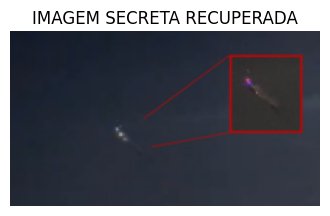

In [ ]:
try:
    imagem_recuperada = Image.open(BytesIO(bytes_imagem_recuperados))

    plt.figure(figsize=(4, 4))
    plt.imshow(imagem_recuperada)
    plt.title("IMAGEM SECRETA RECUPERADA")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Falha ao decodificar a imagem: {e}")

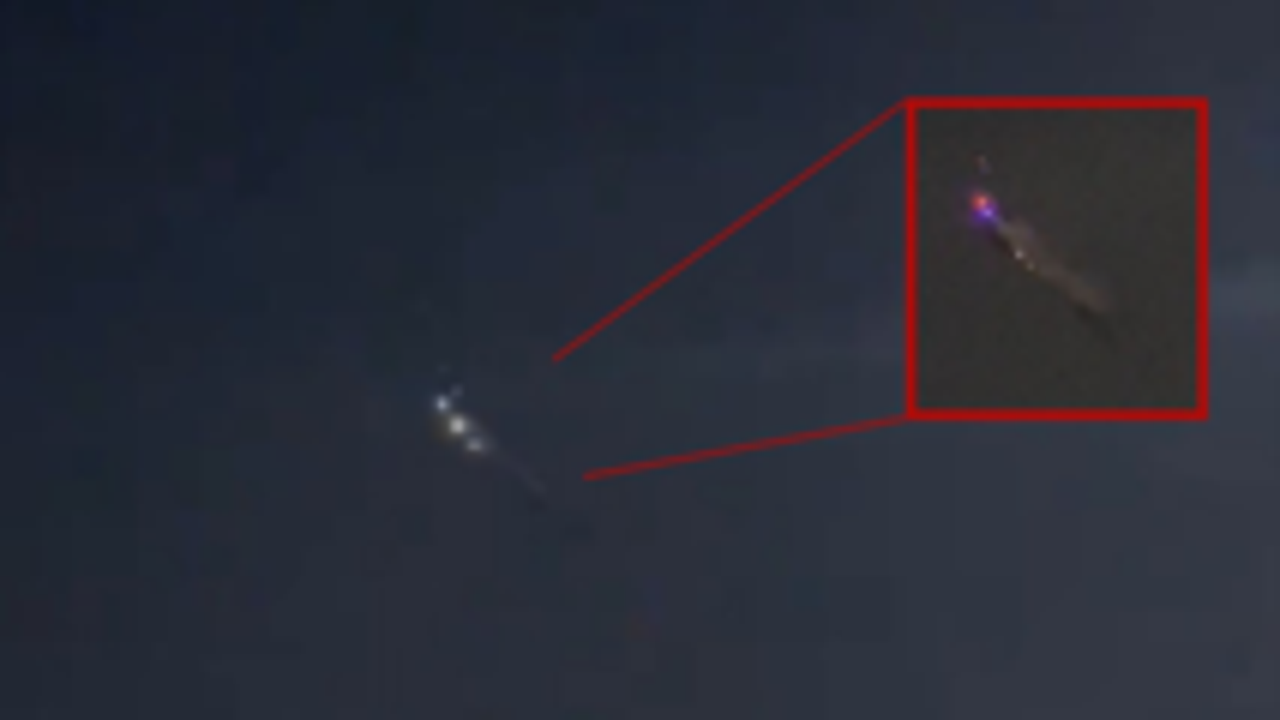

In [ ]:
imagem_recuperada.resize([1280, 720])